<center><font size=6>Sentiment Analysis on Amazon Review Dataset</font></center>

***
# Table of Contents
<font size=5>1. Introduction</font>
<br /><font size=4>&emsp;1.1 What are NLP and Sentiment Analysis?</font>
<br /><font size=4>&emsp;1.2 Objectives</font>
<br /><font size=4>&emsp;1.3 Datasets</font>

<font size=5>2. Processing of the Text</font>
<br /><font size=4>  &emsp;2.1 Tokenization & Normalization</font>
<br /><font size=4>  &emsp;2.2 Vectorization</font>

<font size=5>3. Machine Learning Models & Word Embedding</font>
<br /><font size=4>  &emsp;3.1 Multinomial NB</font>
<br /><font size=4>  &emsp;3.2 SVM</font>
<br /><font size=4>  &emsp;3.3 Logistic Regression</font>
<br /><font size=4>  &emsp;3.4 Neural Network</font>
<br /><font size=4>  &emsp;3.5 Word Embedding</font>

***

# 1. Introduction



## 1.1 What are NLP and Sentiment Analysis?
### NLP
Today, with digitization of everything, 80% of the data being created is unstructured. Audio, video, our social footprints, the data generated from conversations between customer service reps, tons of legal documents, and texts processed in financial sectors are examples of unstructured data stored in Big Data. Organizations are turning to **Natural Language Processing (NLP)** technology to **derive understanding from the myriad unstructured data** available online, in call logs, and in other sources.

- NLP describes the ability of computers to understand human speech as it is spoken. 
- NLP is a branch of artificial intelligence that has many important implications on the ways that computers and humans interact. 
- Machine learning has helped computers parse the ambiguity of human language. Apache OpenNLP, Natural Language Toolkit (NLTK), and Stanford NLP are various open source NLP libraries used in real world applications.

Here are a few common ways NLP is being used today:

- Spell check functionality in Microsoft Word is the most basic and well-known application.
- **Text analysis**, also known as **sentiment analytics**, is a key use of NLP. Businesses can use it to **learn how their customers feel emotionally and use that data to improve their service**.
- By using email filters to analyze the emails that flow through their servers, email providers can use Naive Bayes spam filtering to calculate the likelihood that an email is spam based its content.
- Call center representatives often hear the same, specific complaints, questions, and problems from customers. Mining this data for sentiment can produce incredibly actionable intelligence that can be applied to product placement, messaging, design, or a range of other uses.
- Google, Bing, and other search systems use NLP to extract terms from text to populate their indexes and parse search queries.
- Google Translate applies machine translation technologies in not only translating words, but also in understanding the meaning of sentences to improve translations.
- Financial markets use NLP by taking plain-text announcements and extracting the relevant info in a format that can be factored into making algorithmic trading decisions. For example, news of a merger between companies can have a big impact on trading decisions, and the speed at which the particulars of the merger (e.g., players, prices, who acquires who) can be incorporated into a trading algorithm can have profit implications in the millions of dollars.

### Sentiment Analysis
In today’s world, public content has never been more relevant. **Data from customer reviews** is being used as a tool to **gain insight into consumption-related decisions** as the understanding of its associated sentiment grants businesses invaluable market awareness and the ability to proactively address issues early.

**Sentiment analysis uses a process to computationally determine whether a piece of writing is positive, negative, neutral, or mixed.** 

Some sentiment analysis use cases are:
- Sentiment Analysis for Brand Monitoring:
<br />One of the most well documented uses of Sentiment Analysis is to get a full 360 view of how your brand, product, or company is viewed by your customers and stakeholders. 

- Sentiment Analysis for Customer Service:
<br />Customer service agents often use sentiment analysis to automatically sort incoming user email into “urgent” or “not urgent” buckets based on the sentiment of the email, proactively identifying frustrated users. 

- Sentiment Analysis for Market Research and Analysis:
<br />Sentiment analysis is used in business intelligence to understand the subjective reasons why consumers are or are not responding to something (e.x. why are consumers buying a product? What do they think of the user experience? Did customer service support meet their expectations?).

<img src="sentiment analysis.png" width="600px">

## 1.2 Objectives

In this project, the **purpose** is to build a product to automatically analyze the sentiment of customer review. 

The real Amazon Review Dataset was used as the training data source for model building. 

Then the text was processed using the concept of NLP. **The processing flow includes Tokenization, Normalization and Vectorization**.

It was followed by building the models to classify the sentiment through different **machine learning and deep learning algorithms**.

At last **a product was designed using flask**. The product can not only achieve the emotional evaluation of the comments, but also hightlight the keywords, and realize the interaction between the product and the user through a simple webpage.

## 1.3 Datasets

The real **Amazon Review Dataset** was used for this project. 

The **training dataset** includes **25000 rows** of reviewText, and their sentiment has 12500 "positive" and 12500 "negative".

The **testing dataset** also includes **25000 rows** of reviewText, and their sentiment has 12500 "positive" and 12500 "negative".


<img src="sentiment image1.png" width="600px">

### Get familier with the datasets

In [1]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline

#### 1) Trainning dataset

In [2]:
# Load csv file into DataFrame
train = pd.read_csv('train.csv')

In [3]:
# Get a sample (head) of the data frame
train.head()

,reviewText,sentiment
0,For a movie that gets no respect there sure ar...,pos
1,Bizarre horror movie filled with famous faces ...,pos
2,"A solid, if unremarkable film. Matthau, as Ein...",pos
3,It's a strange feeling to sit alone in a theat...,pos
4,"You probably all already know this by now, but...",pos


In [4]:
print("sentiment  :", train.sentiment[0])
print("reviewText :", train.reviewText[0])

sentiment  : pos
reviewText : For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.


In [5]:
train.shape

(25000, 2)

In [6]:
# Statics on tags
train.sentiment.value_counts()

neg    12500
pos    12500
Name: sentiment, dtype: int64

#### 2) Testing dataset

In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.head()

,reviewText,sentiment
0,"Based on an actual story, John Boorman shows t...",pos
1,This is a gem. As a Film Four production - the...,pos
2,"I really like this show. It has drama, romance...",pos
3,This is the best 3-D experience Disney has at ...,pos
4,"Of the Korean movies I've seen, only three had...",pos


In [9]:
test.shape

(25000, 2)

In [10]:
test.sentiment.value_counts()

neg    12500
pos    12500
Name: sentiment, dtype: int64

# 2. Processing of the Text
This chapter will introduce the processing sequence of the Text data. Below image is the Pipleline for the processing.

### <center>Pipeline</center>
<img src="pipeline.png" width="800px">

### Load data

In [11]:
def load_data(path):
    data = pd.read_csv(path)
    x = data['reviewText'].tolist()
    y = data['sentiment'].tolist()
    return x, y

In [12]:
train_x, train_y = load_data('train.csv')
test_x, test_y = load_data('test.csv')

In [13]:
print('training size:', len(train_x))
print('test size:', len(test_x))

training size: 25000
test size: 25000


## 2.1 Tokenization & Normalization

### Tokenization
Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, some characters like punctuation marks are discarded. The tokens become the input for another process like parsing and text mining.

For most cases are whitespace
- Be careful with words with whitespace ("The United States")

Punctuation mean can be valuable
- ! and ?
- ", ', [], ()
- Even font in a rich text file (web) can mean something

### Normalization
Text normalization is the process of transforming text into a single canonical form that it might not have had before. Normalizing text before storing or processing it allows for separation of concerns, since input is guaranteed to be consistent before operations are performed on it. Text normalization requires being aware of what type of text is to be normalized and how it is to be processed afterwards; there is no all-purpose normalization procedure.

- Lowercase unless it occurs in the middle of a sentence (could be Name/Places/Brand).

### Stemming and Lemmatization
- **Stemming** usually refers to a crude heuristic process that **chops off** the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.
For example: driving -> driv.

- **Lemmatization** usually refers to doing things properly with the use of a **vocabulary and morphological analysis of words**, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the **lemma**. 
For example, driving -> drive, drove -> drive.

In [14]:
lemmatizer = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
transtbl = str.maketrans(string.punctuation, ' ' * len(string.punctuation))

**Stop Words** are words which do not contain important significance to be used in Search Queires. Usually these words are filtered out from search queries because they return vast amount of unnecessary information. The stopwords in the text will be removed in the processing. 
<br>Below is the list of English stop words.

In [15]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Punctuation** in the text will also be removed in the processing.

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
'ababc'.translate(str.maketrans('abc','def'))

'dedef'

#### Define preprocessing

In [18]:
def preprocessing(line):
    line = line.replace('<br />', '')   # Remove html tag (<br />)
    line = line.translate(transtbl)     # Remove punctuation
    
    # Get tokens
    tokens = []
    for t in nltk.word_tokenize(line): # nltk.word_tokenize 将句子拆分成若干个词
        t = t.lower()
        if t not in stopwords:
            lemma = lemmatizer.lemmatize(t, 'v') # 词型还原，默认对名词还原，加了‘v’后对动词也还原
            tokens.append(lemma)
            
    return ' '.join(tokens) # 用空格粘回成一句话

Yet a more compact way to write the code using list comprehension:
```python
def preprocessing(line: str) -> str: # 输入函数line,类型str # -> 输出函数类型str
    line = line.replace('<br />', '').translate(transtbl)
    
    tokens = [lemmatizer.lemmatize(t.lower(),'v')  # What to put in the list
              for t in nltk.word_tokenize(line)    # Where 
              if t.lower() not in stopwords]       # If
                                               # list comprehesion
    return ' '.join(tokens)
```

In [19]:
test_str = "I bought several books yesterday<br /> and I really love them!"
preprocessing(test_str)

'buy several book yesterday really love'

In [20]:
# Preprocess all data
train_x = [preprocessing(x) for x in train_x]
test_x = [preprocessing(x) for x in test_x]

Yet a more modern way to write code use map function:
```python
train_x = list(map(preprocessing, train_x)) # map(函数，可迭代的结构比如 list, dictionary, stack)
test_x = list(map(preprocessing, test_x))
```

### Build vocabulary

In [21]:
# Push all tokens and compute frequency of words
all_words = []
for line in train_x:
    words = line.split()
    for w in words:
        all_words.append(w)
        
voca = nltk.FreqDist(all_words) # nltk.FreqDist

# # Yet another more python-y style
# all_words = [w for line in train_x for w in line.split()] # list comprehension, what to put, where, if
# voca = nltk.FreqDist(all_words)

In [22]:
print(voca)

<FreqDist with 65081 samples and 3022531 outcomes>


In [23]:
voca.most_common(10)

[('film', 48170),
 ('movie', 43912),
 ('one', 26747),
 ('make', 23538),
 ('like', 22335),
 ('see', 20773),
 ('get', 18108),
 ('time', 16143),
 ('good', 15124),
 ('character', 14153)]

In [24]:
topwords = [fpair[0] for fpair in list(voca.most_common(10000))] # 只取第一列:单词

## 2.2 Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

### Bag of Words
Bag of Words (BoW) is an algorithm that **counts how many times a word appears in a document**. Those word counts allow us to compare documents and gauge their similarities for applications like search, document classification and topic modeling. BoW is a method for preparing text for input in a deep-learning net.

BoW lists words with their word counts per document. In the table where the words and documents effectively become vectors are stored, **each row is a word, each column is a document and each cell is a word count**. Each of the documents in the corpus is represented by columns of **equal length**. Those are **wordcount vectors**, an output stripped of context.
<img src="BagofWords.png">
#### CountVectorizer: convert a collection of text documents to a matrix of token counts.

In [26]:
cnt_vec = CountVectorizer()
cnt_vec  # ngram_range=(1,1) bag of words, (1,2) bigram vectorizer, (1,3) bag of word,bigram, trigram 混合的

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [27]:
# Create our BAG of words (specify words we care about)
cnt_vec.fit(topwords)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

### Tf–idf term weighting
**Term-frequency-inverse document frequency (TF-IDF)** is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – **TF-IDF measures relevance, not frequency**. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

First, TF-IDF measures the number of times that words appear in a given document (that’s **term frequency**). But because words such as “and” or “the” appear frequently in all documents, those are systematically discounted. That’s the **inverse-document frequency** part. **The more documents a word appears in, the less valuable that word is as a signal.** That’s intended to leave only the **frequent AND distinctive words** as markers. Each word’s TF-IDF relevance is a **normalized data format** that also adds up to one.

- Tf: term-frequency
- idf: inverse document-frequency
- Tf-idf = $tf(t,d) \times idf(t)$

$$
idf(t) = log{\frac{1 + n_d}{1 + df(d, t)}} + 1
$$

![](http://www.onemathematicalcat.org/Math/Algebra_II_obj/Graphics/log_base_gt1.gif)

<span>**Tips:**</span>

tf-idfs are computed slightly different in sklearn, where:

$$
idf(t) = log{\frac{n_d}{1 + df(d, t)}}
$$

With `smooth_idf=True` set to `True`, the formula is:

$$
idf(t) = log{\frac{n_d}{df(d, t)}} + 1
$$

In [28]:
# Since CountVectorizer and TfidTransformer are often used together
# There is a class named TfidfVectorizer that combine these two steps
tf_vec = TfidfVectorizer()
tf_vec.fit(topwords)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

### Feature Extraction

In [29]:
# Extract features from training set
# Vocabulary is from topwords
train_features = tf_vec.transform(train_x)

In [30]:
# Array[n_train_data * n_features]
train_features.shape  # fit过程中用的tokenization 而不是split, 比如 the United States 一个，而没有split

(25000, 9966)

In [31]:
tf_vec = TfidfVectorizer(vocabulary=topwords) # 设置 vocabulary=topwords
train_features = tf_vec.fit_transform(train_x)
train_features.shape # 25000个文本，10000个feature

(25000, 10000)

In [32]:
# Extract features from test set
test_features = tf_vec.transform(test_x)

In [33]:
test_features.shape

(25000, 10000)

# 3. Machine Learning Models & Word Embeddings 
In this chapter different machine learning models were used to represent word in the numerical way and apply it to a simply 2-layer network for classification.

**Outline**:
- Multinomial NB
- SVM
- Logistic Regression
- Neural Network
- Word Embedding

## 3.1 Multinomial NB
The **multinomial Naive Bayes** classifier is suitable for **classification with discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
mnb_model = MultinomialNB()
mnb_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
# Train Model
import time

start = time.time()
mnb_model.fit(train_features, train_y) # train_y: train label
end = time.time()

print("Multinomial NB model trained in %f seconds" % (end-start))

Multinomial NB model trained in 0.200367 seconds


In [37]:
# Predict
pred = mnb_model.predict(test_features)
print(pred)

['neg' 'pos' 'pos' ..., 'neg' 'neg' 'neg']


In [38]:
# Metrics
# metrics.accuracy_score(y_true, y_pred)
from sklearn import metrics
accuracy = metrics.accuracy_score(pred,test_y)
print(accuracy)

0.83312


In [39]:
# Use keyword arguments to set arguments explicitly
print(metrics.classification_report(y_true=test_y, y_pred=pred)) # 注意顺序不要反了

             precision    recall  f1-score   support

        neg       0.81      0.87      0.84     12500
        pos       0.86      0.80      0.83     12500

avg / total       0.83      0.83      0.83     25000



### Select the number of topwords that has the best metrics accuracy

In [40]:
def train_with_n_topwords(n: int, tfidf=False) -> tuple:
    """
    Train and get the accuracy with different model settings
    Args:
        n: number of features (top frequent words in the vocabulary)
        tfidf: whether do tf-idf re-weighting or not
    Outputs:
        tuple: (accuracy score, classifier, vectorizer)
    """
    topwords = [fpair[0] for fpair in list(voca.most_common(n))]
    
    if tfidf:
        vec = TfidfVectorizer(vocabulary=topwords)
    else:
        vec = CountVectorizer(vocabulary=topwords)
    
    # Generate feature vectors
    train_features = vec.fit_transform(train_x)
    test_features  = vec.transform(test_x)
    
    # NB
    mnb_model = MultinomialNB()
    mnb_model.fit(train_features, train_y)
    
    # Test predict
    pred = mnb_model.predict(test_features)
    
    return metrics.accuracy_score(pred, test_y), mnb_model, vec

In [41]:
train_with_n_topwords(500, tfidf=True)

(0.82496000000000003,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', '..., 'none', 'note', 'hell', 'deliver', 'simple', 'ok', 'allow', 'class', 'david', 'convince', 'check']))

### my_utils.py
```python
# -*- coding: utf-8 -*-
import sys

# Print iterations progress
# Credit: aubricus
# https://gist.github.com/aubricus/f91fb55dc6ba5557fbab06119420dd6a
# Updated: edding
def print_progress(iteration, total, prefix='', suffix='', decimals=1, bar_length=100):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        bar_length  - Optional  : character length of bar (Int)
    """
    str_format = "{0:." + str(decimals) + "f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(bar_length * iteration / float(total)))
    if filled_length == 0 or filled_length == bar_length:
        bar = '=' * filled_length + '.' * (bar_length - filled_length)
    else:
        bar = '=' * (filled_length - 1) + '>' + '.' * (bar_length - filled_length)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percents, '%', suffix)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()
```

In [42]:
from my_utils import print_progress

possible_n = [500 * i for i in range(1, 20)]

cnt_accuracies = []
tfidf_accuracies = []

for i, n in enumerate(possible_n):
    cnt_accuracies.append(train_with_n_topwords(n)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 1, total=2*len(possible_n), prefix='Train and verify:')
    
    tfidf_accuracies.append(train_with_n_topwords(n, tfidf=True)[0])
    print_progress(bar_length=50, decimals=0, iteration=2 * i + 2, total=2*len(possible_n), prefix='Train and verify:')

Train and verify: |==================================================| 100% 


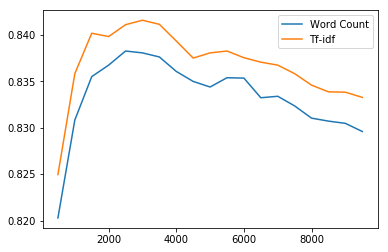

In [43]:
plt.plot(possible_n, cnt_accuracies, label='Word Count')
plt.plot(possible_n, tfidf_accuracies, label='Tf-idf')
plt.legend()

According to the image above, the Word Count and Tf-idf have the best accuracy with topwords number of around 3000. So **3000 topwords** are chosen as the result of tf-idf vectorization in the processing part.

#### Save model

In [44]:
best = train_with_n_topwords(3000, tfidf=True) # best = (acc, model, vec)

In [45]:
import pickle

# Save vectorizer
with open('tf_vec.pkl', 'wb') as pkl_file: # write-binary
    pickle.dump(best[2], pkl_file)

In [46]:
with open('mnb_model.pkl', 'wb') as pkl_file: 
    pickle.dump(best[1], pkl_file)

In [48]:
best

(0.84160000000000001,
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
 TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', '...ncreasingly', 'le', 'cox', 'sketch', 'vary', 'korean', 'mafia', 'carrey', 'cardboard', 'university']))

best[0] = 0.84160000000000001,
<br>best[1] = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
<br>best[2] = TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
         dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
         lowercase=True, max_df=1.0, max_features=None, min_df=1,
         ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents=None, sublinear_tf=False,
         token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=['film', 'movie', 'one', 'make', 'like', 'see', 'get', 'time', 'good', 'character', 'go', 'watch', 'even', 'would', 'think', 'story', 'really', 'well', 'show', 'look', 'much', 'say', 'end', 'know', 'people', 'bad', 'also', 'first', 'great', 'give', 'act', 'take', 'play', 'love', 'come', '...ncreasingly', 'le', 'cox', 'sketch', 'vary', 'korean', 'mafia', 'carrey', 'cardboard', 'university']))

## 3.2 Support Vector Machine (SVM)
In machine learning, support vector machines (SVMs, also support vector networks) are **supervised learning models** with associated learning algorithms that analyze data used for **classification and regression analysis**. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly **mapping** their inputs into **high-dimensional** feature spaces.

In short, what a SVM does is **finding the best hyperplane that separates the data points of two different classes**. For sake of simplicity and because we are creating a sentiment tool, we call these classes ‘positive’ and ‘negative’, and denote them by respectively. **Both sides of the plane represent a different class** and this plane can thus be seen as a **decision boundary** for any new point, because we can easily classify this new point based on which side of the plane it lies. Therefore, after a decision boundary is obtained, a SVM is very useful for making accurate predictions of new data points. 
<img src="svm.png" width="250px">

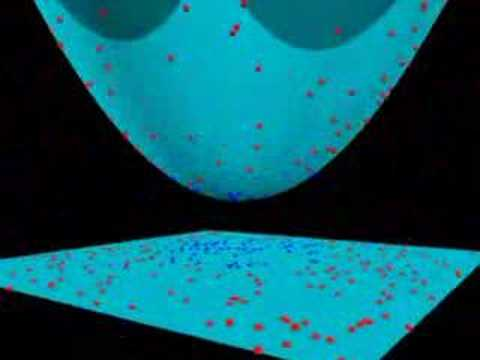

In [149]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

In [49]:
from sklearn.svm import LinearSVC

In [50]:
# Load tf vectors we got last week
with open('tf_vec.pkl', 'rb') as fp:
    tf_vec = pickle.load(fp)

In [51]:
# Convert text to vectors
train_features = tf_vec.transform(train_x)
test_features = tf_vec.transform(test_x)

In [52]:
svm_model = LinearSVC()
svm_model.fit(train_features, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
pred = svm_model.predict(test_features)

In [54]:
accuracy = metrics.accuracy_score(pred,test_y)
print(accuracy)

0.86596


In [55]:
print(metrics.classification_report(y_true=test_y, y_pred=pred))

             precision    recall  f1-score   support

        neg       0.87      0.87      0.87     12500
        pos       0.87      0.87      0.87     12500

avg / total       0.87      0.87      0.87     25000



In [56]:
y_score = svm_model.decision_function(test_features)

In [57]:
y_test_bin = [1 if y == 'pos' else 0 for y in test_y]

In [58]:
precision, recall, _ = metrics.precision_recall_curve(y_test_bin, y_score)

(0.0, 1.0)

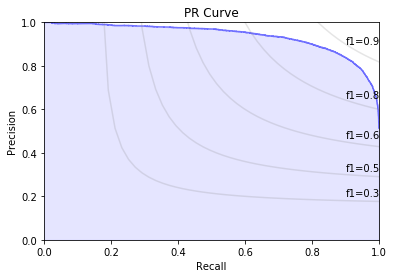

In [59]:
# Draw PR Curve
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')

# Add F-score to the plot as well
f_scores = np.linspace(0.3, 0.9, num=5)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

# Set the limit of the figure
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

<span>**Note:**</span>

For Simple Negation Handling: [Fast and accurate sentiment classification using an enhanced Naive Bayes model](https://pdfs.semanticscholar.org/c7a6/53d57e7f6686a13a37463f5e04e2916a5170.pdf)

## 3.3 Logistic Regression (Max entropy classifier)

In statistics, the logistic model (or logit model) is a statistical model that is usually taken to apply to a **binary dependent variable**. In regression analysis, logistic regression or logit regression is estimating the parameters of a logistic model.  More formally, a logistic model is one where **the log-odds of the probability of an event is a linear combination of independent or predictor variables**. The two possible dependent variable values are often **labelled as "0" and "1"**, which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. The binary logistic regression model can be generalized to more than two levels of the dependent variable: categorical outputs with more than two values are modelled by multinomial logistic regression, and if the multiple categories are ordered, by ordinal logistic regression, for example the proportional odds ordinal logistic model.

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

### Forward Propagation

- Calculate $A = \hat{Y} = \sigma(w^T X + b)$
- Calculate `cost`: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

### Back Propagation:

- Calculate grad `dw`: $\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$
- Calculate grad `db`: $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$

> `sigmoid` is already provided in **ml_utils.py**.

In [60]:
import emoji
from ml_utils import *

### ml_utils.py
```python
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import csv
import emoji
import pandas as pd

def sigmoid(Z):
    '''sigmoid function for matrix Z'''
    return 1/(1 + np.exp(-Z))

def load_iris():
    '''Return iris data set'''
    iris = datasets.load_iris()
    l = len(iris.data)
    X = np.array([iris.data[i] for i in range(l) if iris.target[i] < 2])
    Y = np.array([y for y in iris.target if y < 2])
    Y = Y.reshape(Y.shape[0], 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
    X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
    return X_train, X_test, Y_train, Y_test

def load_moon():
    X, Y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=1234)
    Y = Y.reshape(Y.shape[0], 1)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

    X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
    X, Y = X.T, Y.T
    return X_train, X_test, Y_train, Y_test

# Below credit to deeplearning.ai
# ------------------------------------------------------
def load_emoji():
    X_train, Y_train = read_csv('data/train_emoji.csv')
    X_test, Y_test = read_csv('data/test_emoji.csv')
    return X_train, X_test, Y_train, Y_test

def print_test_report(d, Y_train, Y_test):
    plt.plot(d['costs'])
    
    Y_prediction_test = d['Y_prediction_test']
    Y_prediction_train = d['Y_prediction_train']

    print('Train accuracy: %.1f%%' % (100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print('Test  accuracy: %.1f%%' % (100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)
    plt.show()

def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding='utf-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
    return word_to_vec_map

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def read_csv(filename = 'data/emojify_data.csv'):
    phrase = []
    emoji = []

    with open (filename) as csvDataFile:
        csvReader = csv.reader(csvDataFile)

        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)

    return X, Y

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

emoji_dictionary = {"0": "\u2764\uFE0F",    # :heart: prints a black instead of red heart depending on the font
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)], use_aliases=True)
              
    
def print_predictions(X, pred):
    print()
    for i in range(X.shape[0]):
        print(X[i], label_to_emoji(int(pred[i])))
        
        
def plot_confusion_matrix(y_actu, y_pred, title='Confusion matrix', cmap=plt.cm.gray_r):
    
    df_confusion = pd.crosstab(y_actu, y_pred.reshape(y_pred.shape[0],), rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    df_conf_norm = df_confusion / df_confusion.sum(axis=1)
    
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)
    
    
def predict(X, Y, W, b, word_to_vec_map):
    m = X.shape[0]
    pred = np.zeros((m, 1))
    
    for j in range(m):                       # Loop over training examples
        
        # Split jth test example (sentence) into list of lower case words
        words = X[j].lower().split()
        
        # Average words' vectors
        avg = np.zeros((50,))
        for w in words:
            avg += word_to_vec_map[w]
        avg = avg/len(words)

        # Forward propagation
        Z = np.dot(W, avg) + b
        A = softmax(Z)
        pred[j] = np.argmax(A)
        
    print("Accuracy: "  + str(np.mean((pred[:] == Y.reshape(Y.shape[0],1)[:]))))
    
    return pred
```

In [61]:
# Calcualte cost and grad (dw, db)
# Put dw, db in a dict grad: {'dw': dw, 'db': db}

def propagate(w, b, X, Y):
    
    # Get number of training examples
    m = X.shape[1]
    
    # Get activation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    # Compute grad
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

### Optimize (Gradient Descent)

<table>
    <tr>
        <td><img src="resources/gd1.gif" alt="https://giphy.com/gifs/gradient-6QlTwkigqg4yk"></td>
        <td><img src='resources/gd2.gif' alt="http://songhuiming.github.io/pages/2017/05/13/gradient-descent-in-solving-linear-regression-and-logistic-regression/"></td>
    </tr>
</table>

In [62]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        
        # Forward & Backward prop
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

### Predict

In [63]:
def lr_predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b) # np.array (1, X.shape[1])
    return (A[0, :] > 0.5)

### Build the Model

In [64]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    
    # Initialize w, b
    w, b = np.zeros((X_train.shape[0], 1)), 0
    
    # Optimize
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = params['w']
    b = params['b']
    
    # Test on training set and test set
    Y_prediction_test = lr_predict(w, b, X_test)
    Y_prediction_train = lr_predict(w, b, X_train)
    
    d = {
        'costs': costs,
        'Y_prediction_test': Y_prediction_test,
        'Y_prediction_train': Y_prediction_train,
        'w': w,
        'b': b,
    }
    
    return d

### Test on Iris dataset

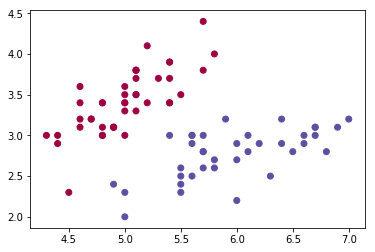

In [65]:
# Load data
X_train, X_test, Y_train, Y_test = load_iris()

# Plot data
plt.scatter(X_train[0,:], X_train[1, :], c=Y_train[0], cmap=plt.cm.Spectral)

In [66]:
d = model(X_train, Y_train, X_test, Y_test, learning_rate=0.005)

Train accuracy: 100.0%
Test  accuracy: 100.0%


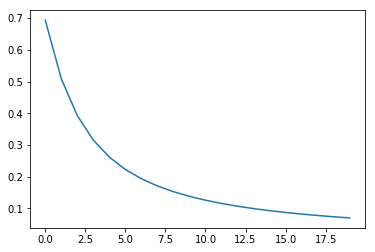

In [67]:
print_test_report(d, Y_train, Y_test)

### On real Amazon dataset
It appears **Memory error** on below cell becuase the model is running out of available RAM.

In [ ]:
d2 = model(train_features, train_y, test_features, test_y, learning_rate=0.005)

In [ ]:
print_test_report(d2, train_y, test_y)

## 3.4 Neural Network
Artificial neural networks (ANNs) or connectionist systems are computing systems vaguely inspired by the biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with any task-specific rules. 

An artificial neural network is an **interconnected group of nodes**, akin to the vast network of neurons in a brain. Each circular node represents an artificial neuron and an **arrow represents a connection from the output** of one artificial neuron to the **input** of another.

### Logistic Regression (1-layer neural network)

<img src="resources/1-layer-nn.png">

<br>
<center>A 1-layer neural network: Logistic Regression</center>

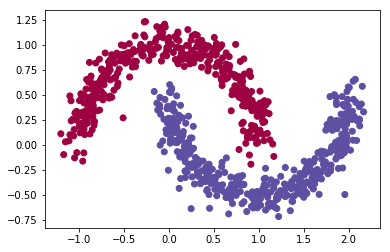

In [69]:
X_train, X_test, Y_train, Y_test = load_moon()
plt.scatter(X_train[0,:], X_train[1,:],c=Y_train[0],cmap=plt.cm.Spectral)

In [70]:
d = model(X_train, Y_train, X_test, Y_test, learning_rate=0.005, num_iterations=8000)

Train accuracy: 85.6%
Test  accuracy: 85.5%


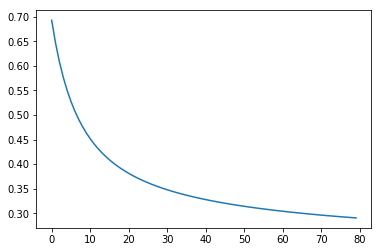

In [71]:
print_test_report(d, Y_train, Y_test)

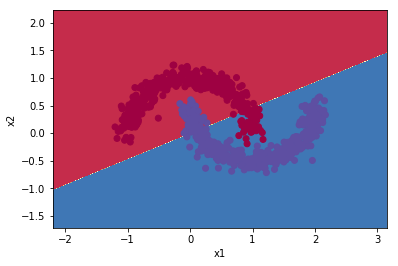

In [72]:
plot_decision_boundary(lambda x: lr_predict(d['w'], d['b'], x.T), X_train, Y_train)

<span>**Notes:**</span>

Logitic regression works not so well when features are not linearly separable. It depends heavily on features, so feature engineering is essential if you are using LR.

### A 2 - Layer Neural Network

<img src="resources/2-layer-nn.png">

<br>
<center>A 2-layer neural network: 1 hidden layer + 1 output layer</center>

```python
def sigmoid(Z):
    '''sigmoid function for matrix Z'''
    return 1/(1 + np.exp(-Z))
```

In [73]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # ------------------
    # Calculate Z1, A1, Z2, A2
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # ------------------
    
    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    
    return A2, cache

- Calculate `cost`: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [74]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    cost = -1/m * np.sum(np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y))
    return np.squeeze(cost)

In [75]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    A1 = cache['A1']
    A2 = cache['A2']
    
    # ------------------
    # Calculate dW1, dW2, db1, db2
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    # ------------------
    
    grads = {
        'dW1': dW1,
        'dW2': dW2,
        'db1': db1,
        'db2': db2,
    }
    
    return grads

In [76]:
def update_parameters(parameters, grads, learning_rate=1.0):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parameters

In [77]:
def nn_model(X, Y, n_h, num_iterations=10000):
    n_x, n_y = X.shape[0], Y.shape[0]
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    for i in range(num_iterations):
        
        # ------------------
        
        # Step 1: forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Step 2: compute cost
        cost = compute_cost(A2, Y, parameters)
        
        # Step 3: compute grad
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Step 4: update parameters (grdient descent)
        parameters = update_parameters(parameters, grads)
        
        # ------------------
        
    return parameters

In [78]:
def nn_predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    return (A2 > 0.5)

In [79]:
parameters = nn_model(X_train, Y_train, n_h = 4)

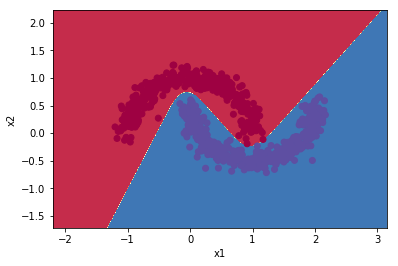

In [80]:
plot_decision_boundary(lambda x: nn_predict(parameters, x.T), X_train, Y_train)

## 3.5 Word Embedding
### Word2vec
Word2vec is a two-layer neural net that processes text. Its **input is a text corpus** and its **output is a set of vectors**: feature vectors for words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep nets can understand. 

BoW is different from Word2vec. The main difference is that **Word2vec produces one vector per word**, whereas **BoW produces one number (a wordcount)**. Word2vec is great for digging into documents and identifying content and subsets of content. Its vectors represent each word’s context, the ngrams of which it is a part. BoW is good for classifying documents as a whole.
### N-gram
Words are read into the vector one at a time, and scanned back and forth within a certain range. Those ranges are n-grams, and an n-gram is **a contiguous sequence of n items from a given linguistic sequence**; it is the nth version of unigram, bigram, trigram, four-gram or five-gram. A skip-gram simply drops items from the n-gram.

The skip-gram representation popularized by Mikolov and used in the DL4J implementation has proven to be more accurate than other models, such as continuous bag of words, due to the more generalizable contexts generated.

This n-gram is then fed into a neural network to learn the **significance of a given word vector**; i.e. significance is defined as its usefulness as an indicator of certain larger meanings, or labels.
### Neural Word Embeddings
The vectors we use to represent words are called neural word embeddings, and representations are strange. One thing describes another, even though those two things are radically different. As Elvis Costello said: “Writing about music is like dancing about architecture.” Word2vec “vectorizes” about words, and by doing so it makes natural language computer-readable – we can start to perform powerful mathematical operations on words to detect their similarities.

So a neural word embedding represents a word with numbers. It’s a simple, yet unlikely, translation.

Word2vec is similar to an autoencoder, **encoding each word in a vector**, but rather than training against the input words through reconstruction, as a restricted Boltzmann machine does, word2vec **trains words against other words that neighbor them in the input corpus**.

These vectors are the basis of a more **comprehensive geometry of words**. Not only will Rome, Paris, Berlin and Beijing cluster near each other, but they will each have similar distances in vectorspace to the countries whose capitals they are; i.e. Rome - Italy = Beijing - China. And if you only knew that Rome was the capital of Italy, and were wondering about the capital of China, then the equation Rome -Italy + China would return Beijing. 

<img src="resources/word-vector.png" width="800">

In [82]:
word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt') # 6 billion个单词，每个单词映射到长度为50的向量上

In [83]:
X_train, X_test, Y_train, Y_test = load_emoji()

In [84]:
# Print the first 5 samples
for i in range(5):
    print(X_train[i], label_to_emoji(Y_train[i]))

never talk to me again 😞
I am proud of your achievements 😄
It is the worst day in my life 😞
Miss you so much ❤️
food is life 🍴


In [85]:
Y_oh_train = convert_to_one_hot(Y_train, C = 5)
Y_oh_test = convert_to_one_hot(Y_test, C = 5)

In [86]:
print(Y_train[0], "is converted into one hot", Y_oh_train[0])

3 is converted into one hot [ 0.  0.  0.  1.  0.]


<img src="resources/word_embedding_1.png" width="800">

In [87]:
def sentence_to_avg(sentence, word_to_vec_map):
    
    # ------------------
    # Convert a sentence string into the average of word vector (dim = 50)
    
    words = sentence.lower().split()
    
    avg = np.zeros((50,))
    cnt = 0
    for w in words:
        avg += word_to_vec_map.get(w, np.zeros((50,)))
        cnt += 1
    avg = avg / cnt
    
    # ------------------
    
    return avg

In [88]:
avg = sentence_to_avg("I like it", word_to_vec_map)
print("avg = ", avg)

avg =  [ 0.36627333  0.04672333 -0.138081   -0.24937467  0.48939667  0.04623667
 -0.47231333 -0.14826667 -0.457185    0.20397252 -0.10503     0.60011667
 -0.61682667 -0.1575      0.78038333  0.55919     0.29008333  0.34581633
 -0.22630233 -0.70794    -0.30531333  0.34949667  0.46258333  0.234054
  0.63990667 -2.12683333 -1.06518     0.45987     0.74048667 -0.92987667
  3.59586667  0.33653667 -0.282609   -0.01870267 -0.19816133 -0.202
  0.05308333  0.35650667  0.30246667 -0.23844333 -0.07741177  0.226214
 -0.09908807  0.37313     0.06784867  0.37182667 -0.147618   -0.43038933
 -0.25390733  0.44703333]


### Model

Assuming here that $Yoh$ ("Y one hot") is the one-hot encoding of the output labels, the equations you need to implement in the forward pass and to compute the cross-entropy cost are:
$$ z^{(i)} = W . avg^{(i)} + b$$
$$ a^{(i)} = softmax(z^{(i)})$$
$$ \mathcal{L}^{(i)} = - \sum_{k = 0}^{n_y - 1} Yoh^{(i)}_k * log(a^{(i)}_k)$$

> `softmax()` is provided.

In [89]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 400):
    np.random.seed(1)

    m = Y.shape[0]                          # number of training examples
    n_y = 5                                 # number of classes  
    n_h = 50                                # dimensions of the GloVe vectors 
    
    # Xavier initialization
    W = np.random.randn(n_y, n_h) / np.sqrt(n_h)
    b = np.zeros((n_y,))
    
    # Convert Y to Y_onehot with n_y classes
    Y_oh = convert_to_one_hot(Y, C = n_y) 
    
    # Optimization
    for t in range(num_iterations):                       # Loop over the number of iterations
        for i in range(m):                                # Loop over the training examples
            
            
            # ------------------
            # Convert a sentence string into the average of word vector (dim = 50)
            
            # Step 0: sentence to average vector
            avg = sentence_to_avg(X[i], word_to_vec_map)
            
            # Step 1: forward propagation
            z = np.dot(W, avg) + b
            a = softmax(z)
            
            # Step 2: compute cost
            cost = -np.sum(Y_oh[i] * np.log(a))
            
            # Step 3: compute grad
            dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(n_y,1), avg.reshape(1, n_h))
            db = dz
            
            # Step 4: update parameters (grdient descent)
            W = W - learning_rate * dW
            b = b - learning_rate * db
            # ------------------
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [90]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)

Epoch: 0 --- cost = 1.95204988128
Accuracy: 0.348484848485
Epoch: 100 --- cost = 0.0797181872601
Accuracy: 0.931818181818
Epoch: 200 --- cost = 0.0445636924368
Accuracy: 0.954545454545
Epoch: 300 --- cost = 0.0343226737879
Accuracy: 0.969696969697


In [91]:
print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.977272727273
Test set:
Accuracy: 0.857142857143


In [92]:
X_my_sentences = np.array([
    "you romanced me", 
    "you are horrible", 
    "funny lol", 
    "lets play with a ball", 
    "food is ready", 
    "not feeling happy"])
Y_my_labels = np.array([[0], [3], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 0.833333333333

you romanced me ❤️
you are horrible 😞
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😄


## References
1. https://www.digitalistmag.com/digital-economy/2017/02/20/simple-introduction-to-natural-language-processing-04906091
2. https://blog.algorithmia.com/introduction-sentiment-analysis/
3. https://skymind.ai/wiki/word2vec
4. https://skymind.ai/wiki/bagofwords-tf-idf
5. https://www.deeplearning.ai/